In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [512]:
def mse(y_true, y_pred):
    return np.mean(np.power((y_true - y_pred), 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true)/np.size(y_true)

In [513]:
def cross_entropy(y_true, y_pred):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[1]

def cross_entropy_prime(y_true, y_pred):
#     return -y_true / y_pred
    return y_pred - y_true

In [514]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        pass

    def backward(self, output_gradient, learning_rate):
        pass

In [515]:
class Dense(Layer):
    def __init__(self, input_size, output_size):
#         self.weights = np.random.randn(output_size, input_size)
#         self.bias = np.random.randn(output_size, 1)
#         self.weights = np.random.randn(output_size, input_size) * np.sqrt(2 / input_size)
#         self.bias = np.zeros((output_size, 1))
        self.weights = np.random.normal(0, np.sqrt(2 / (input_size + output_size)), (output_size, input_size))
        self.bias = np.zeros((output_size, 1))
        
    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias
    
    def backward(self, output_gradient, learning_rate):
        dEdX = np.dot(self.weights.T, output_gradient)
        weights_gradient = np.dot(output_gradient, self.input.T)
        self.weights -= learning_rate * weights_gradient        
#         self.bias -= learning_rate * output_gradient
        self.bias -= learning_rate * np.reshape(np.sum(output_gradient, axis= 1), (output_gradient.shape[0], 1))

        return dEdX
        

In [516]:
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
        
    def forward(self, input):
        self.input = input
        return self.activation(self.input)
    
    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

In [517]:
class ReLU(Activation):
    def __init__(self):
        relu = lambda x: np.maximum(0, x)
        relu_prime = lambda x: np.where(x > 0, 1, 0)
        super().__init__(relu, relu_prime)

In [518]:
# class Softmax(Activation):
#     def __init__(self):
#         softmax = lambda x: np.exp(x) / np.sum(np.exp(x), axis=0)
        
#         def make_jacobian(x):
#             s = softmax(x).reshape(-1, 1)
#             jacobian = np.diagflat(s) - np.dot(s, s.T)
#             return jacobian
                        
#         softmax_prime = make_jacobian

#         super().__init__(softmax, softmax_prime)

class Softmax(Activation):
    def __init__(self):
        def softmax(x):
            exp_values = np.exp(x - np.max(x, axis=0, keepdims=True)) 
            return exp_values / np.sum(exp_values, axis=0, keepdims=True)
        
        def softmax_prime(x):
            return 1 
            
        super().__init__(activation=softmax, activation_prime=softmax_prime)

In [519]:
class Tanh(Activation):
    def __init__(self):
        tanh = lambda x: np.tanh(x)
        tanh_prime = lambda x: 1 - np.tanh(x)**2
        super().__init__(tanh, tanh_prime)

**SOLVE XOR PROBLEM**

In [520]:
X = np.reshape([[0,0], [0,1], [1,0], [1,1]], (4,2,1))
Y = np.reshape([[0], [1], [1], [0]], (4,1,1))

In [521]:
network_xor = [Dense(2, 4), Tanh(), Dense(4,1), Tanh()]


epoch = 0, error = 0.3794699963263519
epoch = 1, error = 0.3988568994400156
epoch = 2, error = 0.3905515184189131
epoch = 3, error = 0.3831956573713088
epoch = 4, error = 0.37807564469933674
epoch = 5, error = 0.3743480738779524
epoch = 6, error = 0.3714026243598015
epoch = 7, error = 0.36889126205967154
epoch = 8, error = 0.366616575983241
epoch = 9, error = 0.36446500752929245
epoch = 10, error = 0.3623714915340024
epoch = 11, error = 0.3602998208742597
epoch = 12, error = 0.3582311549097046
epoch = 13, error = 0.35615709032796067
epoch = 14, error = 0.354075423364724
epoch = 15, error = 0.35198753993911047
epoch = 16, error = 0.34989680253215527
epoch = 17, error = 0.34780755201813796
epoch = 18, error = 0.3457244912403019
epoch = 19, error = 0.34365230691151083
epoch = 20, error = 0.3415954411748914
epoch = 21, error = 0.33955795780327086
epoch = 22, error = 0.3375434688089617
epoch = 23, error = 0.3355551001230672
epoch = 24, error = 0.33359548298338143
epoch = 25, error = 0.33166

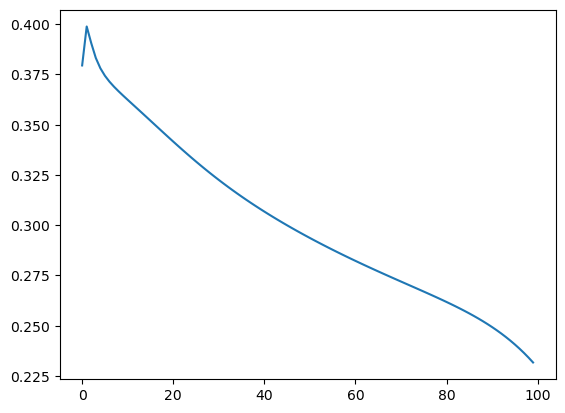

In [522]:
epochs = 100
learning_rate = 0.1
errors = []
error = 0

for e in range(epochs):
    for x, y in zip(X, Y):
#         print(x, y)
        forward_data = x
        for layer in network_xor:
            forward_data = layer.forward(forward_data)
        
#         print('forward data', forward_data)

        error += mse(y, forward_data)

        grad = mse_prime(y, forward_data)
#         print("grad = ", grad, ", grad shape = ", grad.shape)

        for layer in reversed(network_xor):
            grad = layer.backward(grad, learning_rate)
            
#             print("grad = ", grad, ", grad shape = ", grad.shape)



    error /= len(X)
    errors.append(error)
    print(f"epoch = {e}, error = {error}")
        
        
plt.plot(range(0, epochs), errors)

In [203]:
def one_hot(num, length):
    
    ans = np.zeros(length)
    ans[num] = 1
    
    return ans.reshape(-1,1)

In [482]:
data = pd.read_csv(r'C:/Users/sasha/Desktop/JUPYTER/Datasets/mnist/mnist_train.csv')
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [275]:
Y_mnist = data['label'].to_numpy()
Y_train = np.hstack([one_hot(elem, 10) for elem in Y_mnist])
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [338]:
X_train = data.drop(columns='label').to_numpy().T
X_train = (X_train/ 255)
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [634]:
np.argmax(np.array([[1,2,3],[4,5,6],[7,8,9]]), axis= 0)

array([2, 2, 2], dtype=int64)

In [525]:
network = [Dense(28*28, 256), Tanh(), Dense(256, 128), Tanh(), Dense(128, 10), Softmax()]

  0%|          | 0/30 [00:00<?, ?it/s]

epoch = 0, error = 2045.0795914124303
epoch = 1, error = 1136.0900181052873
epoch = 2, error = 641.5089497065719
epoch = 3, error = 375.9603703669145
epoch = 4, error = 231.9124665477793
epoch = 5, error = 151.2753315020662
epoch = 6, error = 104.95837530943321
epoch = 7, error = 74.34428192072055
epoch = 8, error = 56.49577761809701
epoch = 9, error = 42.30660604373702
epoch = 10, error = 34.04579257441804
epoch = 11, error = 27.044936824324047
epoch = 12, error = 22.19905693752826
epoch = 13, error = 17.79325269189481
epoch = 14, error = 15.291519985598633
epoch = 15, error = 12.929546906798869
epoch = 16, error = 10.03062966732215
epoch = 17, error = 7.311751969206081
epoch = 18, error = 5.4703631054324395
epoch = 19, error = 3.8796952727043705
epoch = 20, error = 2.623689590094114
epoch = 21, error = 1.8242446358825473
epoch = 22, error = 1.3283479774927067
epoch = 23, error = 1.0235607917754612
epoch = 24, error = 0.8304026496152432
epoch = 25, error = 0.7024883723019462
epoch = 2

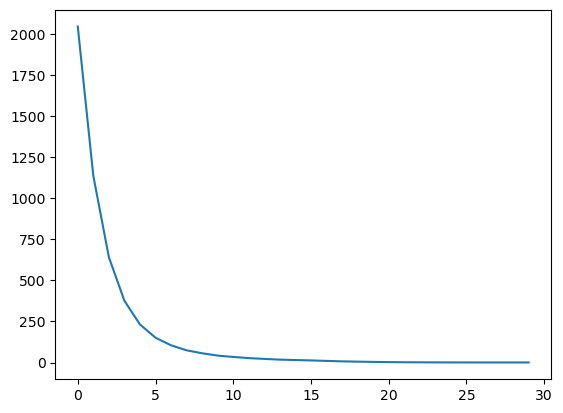

In [526]:
epochs = 30
learning_rate = 0.01
batch_size = 64

errors = []
error = 0

for e in tqdm(range(epochs)):
    for i in range(0, X_train.shape[1], batch_size):
#         print(x, y)
        forward_data = X_train[:, i: i + batch_size]
        for layer in network:
            forward_data = layer.forward(forward_data)
        
        error += cross_entropy(Y_train[:, i: i + batch_size], forward_data)

        grad = cross_entropy_prime(Y_train[:, i: i + batch_size], forward_data)

        for layer in reversed(network):
            grad = layer.backward(grad, learning_rate)

    error /= len(x)
    errors.append(error)
    print(f"epoch = {e}, error = {error}")
        
        
plt.plot(range(0, epochs), errors)

In [557]:
test_data = pd.read_csv(r'C:/Users/sasha/Desktop/JUPYTER/Datasets/mnist/mnist_test.csv')
X_test = test_data.drop(columns='label').to_numpy().T
X_test = (X_test/ 255)

Y_mnist_test = test_data['label'].to_numpy()
Y_test = np.hstack([one_hot(elem, 10) for elem in Y_mnist_test])

X_test.shape, Y_test.shape

((784, 10000), (10, 10000))

In [604]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
        
    return output

In [623]:
def get_accuracy(answers, predictions):
    
    max_in_columns = np.max(predictions, axis = 0)
    one_hot_predictions = (predictions == max_in_columns).astype(int)
    
    mistake_count = np.any(one_hot_predictions != answers, axis=0)
    accuracy = 1 - np.sum(mistake_count)/answers.shape[1]
    
    print(f"Accuracy on {answers.shape[1]} samples is {accuracy}")
    return accuracy

In [ ]:
def show_mistakes(answers, predictions):
    pass    

In [626]:
get_accuracy(Y_test, predict(network, X_test))

Accuracy on 10000 samples is 0.9797


0.9797

In [688]:
def show_and_predict(network, X, answers, index):
    
    """
    Just for one sample
    input.shape must be (., 1) for correct showing
    
    """
    output = X[:, index].reshape(-1,1)
    
    image_28x28 = output.reshape(28, 28)
    plt.imshow(image_28x28, cmap='gray')
    plt.axis('off') 
    plt.show()
    
    for layer in network:
        output = layer.forward(output)
    
    prediction = np.argmax(output)
    true_label = np.argmax(answers[:, index].reshape(-1,1))
    
    print(f"Label = {prediction}, probability = {output[prediction]}, true_label = {true_label} ")
    
#     return output

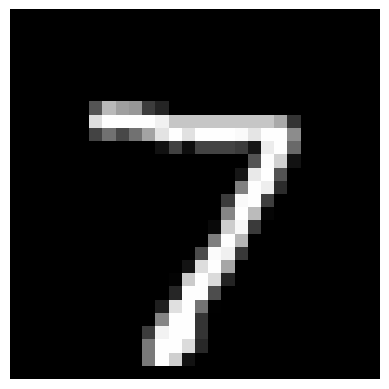

Label = 7, probability = [1.], true_label = 7 


In [698]:
show_and_predict(network, X_test, Y_test, 0)
